In [ ]:
!pip install langchain langchain_core langchain_core langchain_groq langchain_community langchain langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
import os
from typing import TypedDict, Annotated, List
from langgraph.graph import StateGraph, END
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display,Image

In [ ]:
# Define Agent

In [ ]:
class PlannerState(TypedDict):
  messages : Annotated[List[HumanMessage | AIMessage], "the messages in the conversation"]
  city: str
  interests: List[str]
  itinerary: str


In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    temperature=0,
    groq_api_key = "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",
    model_name = "llama-3.3-70b-versatile"

)


In [ ]:
itinerary_prompt = ChatPromptTemplate.from_messages([
    ("system","You are a helpful travel assistant. Create a day trip itinerary for {city} based on the user's interests: {interests}. Provide a brief, bulleted itinerary."),
    ("human","Create an itinerary for my day trip."),
])

In [ ]:
# Define Agent Functions

In [ ]:
def input_city(state: PlannerState) -> PlannerState:
  print("Please enter the city you want to travel to visit for your day trip: ")
  user_message = input("Your Input: ")
  return{
      **state,
      "city": user_message,
      "messages": state["messages"] + [HumanMessage(content=user_message)]
  }

def input_interest(state: PlannerState) -> PlannerState:
  print(f"Please enter your interest for the trip to: {state['city']} (comma-separted): ")
  user_message = input("Your Input:")
  return {
      **state,
      "interests": [interest.strip() for interest in user_message.split(",")],
      "messages": state["messages"] + [HumanMessage(content=user_message)]
  }


def create_itinerary(state: PlannerState) -> PlannerState:
  print(f"Creating an itinerary for {state['city']} based in iterests : {', '.join(state['interests'])} ")
  response = llm.invoke(itinerary_prompt.format_messages(city = state['city'], interests = ', '.join(state['interests'])))
  print("\nFinal Itinerary: ")
  print(response.content)
  return {
      **state,
      "messages": state["messages"] + [AIMessage(content=response.content)],
      "itinerary": response.content,
  }

In [ ]:
# Creating and Compile the Graph

In [ ]:
workflow = StateGraph(PlannerState)

workflow.add_node("input_city", input_city)
workflow.add_node("input_interest", input_interest)
workflow.add_node("create_itinerary", create_itinerary)

workflow.set_entry_point("input_city")

workflow.add_edge("input_city", "input_interest")
workflow.add_edge("input_interest", "create_itinerary")
workflow.add_edge("create_itinerary", END)


app = workflow.compile()

In [ ]:
# Dispalying the Gaph Structure

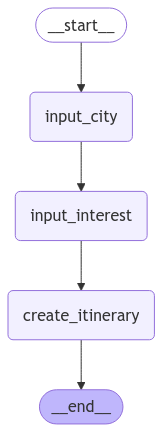

In [ ]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

In [ ]:
# Define the function that runs the graph

In [ ]:
def travel_planner(user_request: str):
  print(f"Initial Request: {user_request}\n")
  state = {
      "messages": HumanMessage(content=user_request),
      "city": "",
      "interests": [],
      "itinerary": "",
  }
  for output in app.stream(state):
    pass

In [ ]:
user_request = "I want to plan a day trip"
travel_planner(user_request)

Initial Request: I want to plan a day trip

Please enter the city you want to travel to visit for your day trip: 
Your Input: banglore
Please enter your interest for the trip to: banglore (comma-separted): 
Your Input:Bangalore
Creating an itinerary for banglore based in iterests : Bangalore 

Final Itinerary: 
Here's a brief, bulleted itinerary for a day trip to Bangalore based on popular interests:

* 8:00 AM - 9:00 AM: Start the day with breakfast at MTR (Mavalli Tiffin Room), a iconic Bangalore eatery.
* 9:30 AM - 11:00 AM: Visit the Lalbagh Botanical Garden, a beautiful green space with a stunning glasshouse and a variety of plant species.
* 11:30 AM - 1:00 PM: Explore the Bangalore Palace, a historic palace with a mix of Tudor and Victorian architecture.
* 1:00 PM - 2:30 PM: Take a break for lunch at a local restaurant, trying some popular Bangalore dishes like idlis, vadas, or biryani.
* 3:00 PM - 5:00 PM: Visit the ISKCON Temple, a beautiful temple dedicated to Lord Krishna, wi

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
from typing import TypedDict, Annotated, List
from langgraph.graph import StateGraph, END
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq



class PlannerState(TypedDict):
  messages : Annotated[List[HumanMessage | AIMessage], "the messages in the conversation"]
  city: str
  interests: List[str]
  itinerary: str

# Define the LLM
llm = ChatGroq(
    temperature=0,
    groq_api_key = "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",
    model_name = "llama-3.3-70b-versatile"

)


# Define the itinerary prompt
itinerary_prompt = ChatPromptTemplate.from_messages([
    ("system","You are a helpful travel assistant. Create a day trip itinerary for {city} based on the user's interests: {interests}. Provide a brief, bulleted itinerary: " ),
    ("human","Create an itinerary for my day trip."),
])

def input_city(city:str, state: PlannerState) -> PlannerState:
  return{
      **state,
      "city": city,
      "messages": state["messages"] + [HumanMessage(content=city)],
  }

def input_interest(interests: str, state: PlannerState) -> PlannerState:
  return {
      **state,
      "interests": [interest.strip() for interest in interests.split(",")],
      "messages": state["messages"] + [HumanMessage(content=interests)],
  }

def create_itinerary(state: PlannerState) -> str:
  response = llm.invoke(itinerary_prompt.format_messages(city = state['city'], interests = ', '.join(state['interests'])))
  state["itinerary"] = response.content
  state["messages"] += [AIMessage(content=response.content)]
  return response.content


# Define the Gradio Application
def travel_planner(city:str, interests: str):
  # Initialize State
  state = {
      "messages": [],
      "city": "",
      "interests": [],
      "itinerary": "",
  }


  # process the city and interests input
  state = input_city(city, state)
  state = input_interest(interests, state)

  # Generate the itinerary
  itinerary = create_itinerary(state)


  return itinerary



# Build the Gradio interface
interface = gr.Interface(
    fn=travel_planner,
    theme='Yntec/HaleyCH_Theme_Orange_Green',
    inputs = [
        gr.Textbox(label = "Enter the city for your day trip"),
        gr.Textbox(label = "Enter your interests (comma-separated)"),
    ],
    outputs = gr.Textbox(label = "Generated Itinerary"),
    title = "Travel Itinerary Planner",
    description = "Enter a city and your interests to generate a personalized day trip itinerary. "
)

# Launch the Gradio Application
interface.launch()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


themes/theme_schema@0.0.1.json:   0%|          | 0.00/12.6k [00:00<?, ?B/s]

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://972b6543f09862e51d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
